<h1>Load libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from collections import namedtuple
import cv2
import matplotlib.pyplot as plt # Python defacto plotting library
%matplotlib inline 

<h1>Load original image

In [2]:
#img=cv2.imread("image161.jpg")
img=cv2.imread("images.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

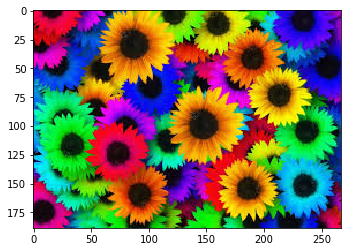

In [3]:
plt.imshow(img)

<h1>減色処理

Clustering

In [4]:
num_cluster = 4
km = KMeans(n_clusters=num_cluster, random_state=10)

In [5]:
shape=img.shape

In [6]:
X=img.reshape(shape[0]*shape[1],shape[2])

In [7]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

Colors

In [8]:
km.cluster_centers_

array([[218.41925519, 120.17704937,  19.51902065],
       [ 18.50917209, 203.5103368 , 103.86246724],
       [ 36.72843939,  30.91345199,  29.91329921],
       [ 81.57342511,  25.60773884, 198.63235294]])

Map subtracted colors

In [9]:
Y=km.predict(X)

In [10]:
centers=np.zeros(km.cluster_centers_.shape,dtype=np.uint8)

In [11]:
for i in range (0,km.cluster_centers_.shape[0]):
    val=km.cluster_centers_[i]
    for j in range (0,km.cluster_centers_.shape[1]):
        centers[i][j]=int(val[j])

In [12]:
img_cnv=np.empty((0,3),dtype=np.uint8)

In [13]:
for i in range (0,Y.shape[0]):
    rgb=centers[Y[i]]
    img_cnv=np.append(img_cnv,np.array([rgb]), axis=0)

Show subtracted color

In [14]:
img_cnv=img_cnv.reshape(img.shape)

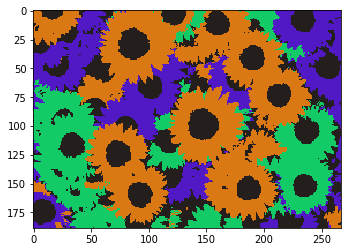

In [15]:
plt.imshow(img_cnv)